# <u>Preprocesamiento y revisión de variables - Parte 2</u>

## Funnel de Modelamiento


## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [5]:
seed = 2021

Definimos 2 columnas relevantes, el id y el target, que en nuestro caso son las siguientes variables:

In [6]:
id_columns = 'Loan_ID'
target = 'Loan_Status'

Cargamos de nuevo las bases donde nos quedamos para continuar:

In [8]:
X_train_export = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_preprocesed.csv')
X_test_export = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\test_preprocesed.csv')

target = 'Loan_Status'

Separar la variable objetivo del conjunto de datos

In [10]:
X_train_scaled = X_train_export.drop(target, axis = 1)  # para borrar columnas
y_train = X_train_export[target]

In [11]:
X_test_scaled = X_test_export.drop(target, axis = 1)  # para borrar columnas
y_test = X_test_export[target]

## Balanceo de clases

Todo balanceo se realiza solo sobre la data de entrenamiento

In [12]:
# target original en la base train
y_train.mean()    #considerar las técnicas de balanceo cuando el target original es menor a 5%

0.3136456211812627

In [13]:
# cantidad de registros de la base
X_train_scaled.shape

(491, 18)

In [19]:
y_train.value_counts()

Loan_Status
0    337
1    154
Name: count, dtype: int64

la categoria de exitos (1) son los de menor proporcion

***Undersampling y oversampling***

In [ ]:
#!pip install --user imblearn

In [16]:
# si hay problemas para importar lalibería imblearn, se debe a la nueva versión 1.3.0 de sklearn,
# debemos realizar un downgrade de dicha librería

import sklearn as s
s.__version__

'1.4.1.post1'

In [ ]:
#por si no

#!pip uninstall scikit-learn
#!pip install scikit-learn==1.2.2

In [17]:
import imblearn

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## UnderSampling

In [20]:
# Submuestreo: Seleccionamos todo el target y un número menor de observaciones no target

rus = RandomUnderSampler(sampling_strategy =1, random_state = 2022) #al colocar el valor 1 indicamos que la proporcion sera del 50% para los casos de exito y fracaso

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [21]:
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

In [22]:
X_rus.shape 

(308, 18)

In [23]:
y_rus.mean() #ahora tenemos una proporcion de 50% tanto para 1 como para 0

0.5

In [24]:
y_rus.value_counts()

Loan_Status
0    154
1    154
Name: count, dtype: int64

Hemos realizado un UnderSampling de los casos no exitosos (hemos reducido su tamaño para que coincida con los casos de exito)

## OverSampling

In [25]:
y_train.value_counts()

Loan_Status
0    337
1    154
Name: count, dtype: int64

In [28]:
# Sobremuestreo: Ampliamos el número de observaciones target mediante remuestreo

rov = RandomOverSampler(sampling_strategy = 1, random_state = 2022) #al colocar el valor 1 indicamos que la proporcion sera del 50% para los casos de exito y fracaso

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [29]:
X_rov, y_rov = rov.fit_resample(X_train_scaled, y_train)

In [30]:
X_rov.shape

(674, 18)

In [31]:
y_rov.mean()

0.5

In [32]:
y_rov.value_counts()

Loan_Status
0    337
1    337
Name: count, dtype: int64

Hemos realizado un OverSampling de los casos no exitosos (hemos aumentado el tamaño de los casos de exitos para que coincida con los casos de no exito)

***Exportar conjuntos de datos balanceados***

In [38]:
X_train_export_rus = X_rus.copy()  #hacemos una copia de los datos balanceados con el undersampling
X_train_export_rus[target] = y_rus.values

In [39]:
X_train_export_rus.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_preprocesed_rus.csv', index = False)

In [40]:
X_train_export_rov = X_rov.copy() #hacemos una copia de los datos balanceados con el oversampling
X_train_export_rov[target] = y_rov.values

In [41]:
X_train_export_rov.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_preprocesed_rov.csv', index = False)

***Smote***

In [42]:
from imblearn.over_sampling import SMOTE

In [45]:
#smote crea nuevos "unos" que se parezcan a los originales mediante vecinos cercanos (KNN)

smote = SMOTE(sampling_strategy = 1, random_state = 2022) #al colocar el valor 1 indicamos que la proporcion sera del 50% para los casos de exito y fracaso

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [47]:
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [48]:
y_smote.mean()

0.5

In [49]:
y_smote.value_counts()

Loan_Status
0    337
1    337
Name: count, dtype: int64

La tecnica SMOTE siempre hace un oversampling, es decir incrementa la cantidad hasta igual al valor mayoritario ya sea 1 o 0

***Smote + Tomek***

In [50]:
from imblearn.combine import SMOTETomek

In [51]:
smotetomek = SMOTETomek(sampling_strategy = 1, random_state = 2022)

In [52]:
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

In [53]:
y_smotetomek.mean()

0.5

In [54]:
y_smotetomek.value_counts()

Loan_Status
0    313
1    313
Name: count, dtype: int64

La tecnia SMOTETomek, lo que hace es eliminar los valores que estan cerca de la frotera de 1 y 0 hasta igual haciendo un oversampling, el hecho que sea menor a 337, es que hay valores que se eliminan

***Exportar conjuntos de datos balanceados***

In [56]:
X_train_smotetomek = X_smotetomek.copy()
X_train_smotetomek[target] = y_smotetomek.values

In [57]:
X_train_smotetomek.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_preprocesed_smotetomek.csv', index = False)

Ahora que tenemos las bases balanceadas, podemos probar las diferentes bases en el modelamiento.

## Técnicas adicionales de creación de variables

In [58]:
X_train_scaled.head()

# no puede existir valores nulos (NaN) ni variables con valores muy grandes

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
0,0.000000,0.102608,0.000000,0.176287,0.74359,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.048997,0.085346,0.034026,0.073871,0.382542,0.258596
1,0.000000,0.032689,0.070415,0.131045,0.74359,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.079811,0.121438,0.025294,0.038672,0.177346,0.350876
2,0.333333,0.078727,0.000000,0.134165,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.035226,0.028113,0.025896,0.068418,0.326363,0.205717
3,0.000000,0.202924,0.000000,0.182527,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.106843,0.153100,0.035230,0.042957,0.546906,0.413303
4,0.000000,0.080072,0.057720,0.159126,0.74359,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.094309,0.138419,0.030714,0.041321,0.329810,0.385987


### a. Creación de variables polinómicas y de interacciones

In [59]:
# Creamos las variables polinomicas y de interacciones!

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias= False) #vamos a generar relaciones polinomicas de grado 2, no incluir interacciones, no incluir sesgo
crossed_feats = poly.fit_transform(X_train_scaled.values) #solo vamos a transformar las co-variables (X)

Esta creacion de nuevas variables va a permitir al algoritmo encontrar relaciones ocultas entre las variables, y asi obtener un mejor desempeño, solo se recomienda realizar con un maximo de grado 2, para saber exactamente que variables se estan realicionando

In [60]:
##### ponerle el nombre a las nuevas variables polinomiales

crossed_feats

array([[0.        , 0.10260755, 0.        , ..., 0.1463387 , 0.09892407,
        0.06687207],
       [0.        , 0.03268894, 0.07041544, ..., 0.03145156, 0.06222636,
        0.12311375],
       [0.33333333, 0.07872675, 0.        , ..., 0.10651274, 0.06713849,
        0.0423196 ],
       ...,
       [0.66666667, 0.07086459, 0.02800778, ..., 0.09328325, 0.08911515,
        0.08513329],
       [0.        , 0.09339999, 0.        , ..., 0.13108471, 0.08664501,
        0.05727104],
       [0.        , 0.11458999, 0.04003168, ..., 0.16592853, 0.15910878,
        0.15256932]])

In [61]:
poly.get_feature_names_out(X_train_scaled.columns) #obtener el nombre de las variables

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome', 'Dependents^2', 'Dependents ApplicantIncome',
       'Dependents CoapplicantIncome', 'Dependents LoanAmount',
       'Dependents Loan_Amount_Term', 'Dependents Credit_History',
       'Dependents Gender_Male', 'Dependents Married_Yes',
       'Dependents Education_Not Graduate',
       'Dependents Self_Employed_Yes',
       'Dependents Property_Area_Semiurban',
       'Dependents Property_Area_Urban', 'Dependents TotalIncome',
       'Dependents TotalIncomeByPerson', 'Dependents Cuota',
       'Dependents %Cuota', 'Dependents log_ApplicantIncome',
       'Dependents log_TotalIncome', 'ApplicantIncome^2',
       'Applic

In [62]:
# Convertimos el array en dataframe!
X_train_num_imputed2 = pd.DataFrame(crossed_feats, columns = poly.get_feature_names_out(X_train_scaled.columns))

In [63]:
X_train_num_imputed2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,...,Cuota^2,Cuota %Cuota,Cuota log_ApplicantIncome,Cuota log_TotalIncome,%Cuota^2,%Cuota log_ApplicantIncome,%Cuota log_TotalIncome,log_ApplicantIncome^2,log_ApplicantIncome log_TotalIncome,log_TotalIncome^2
0,0.000000,0.102608,0.000000,0.176287,0.74359,1.0,0.0,0.0,0.0,1.0,...,0.001158,0.002514,0.013016,0.008799,0.005457,0.028259,0.019103,0.146339,0.098924,0.066872
1,0.000000,0.032689,0.070415,0.131045,0.74359,0.0,1.0,1.0,1.0,0.0,...,0.000640,0.000978,0.004486,0.008875,0.001496,0.006858,0.013569,0.031452,0.062226,0.123114
2,0.333333,0.078727,0.000000,0.134165,0.74359,1.0,1.0,1.0,0.0,1.0,...,0.000671,0.001772,0.008451,0.005327,0.004681,0.022329,0.014075,0.106513,0.067138,0.042320
3,0.000000,0.202924,0.000000,0.182527,0.74359,1.0,1.0,0.0,0.0,0.0,...,0.001241,0.001513,0.019268,0.014561,0.001845,0.023493,0.017754,0.299106,0.226038,0.170820
4,0.000000,0.080072,0.057720,0.159126,0.74359,1.0,1.0,0.0,1.0,0.0,...,0.000943,0.001269,0.010130,0.011855,0.001707,0.013628,0.015949,0.108775,0.127303,0.148986


In [64]:
X_train_num_imputed2.shape

(491, 189)

### b. Creación de variables a partir del Análisis de Componentes Principales (PCA)

Es una técnica estadística de síntesis de la información o reducción de la dimensión (número de variables) El objetivo será reducirlas a un menor número perdiendo la menor cantidad de información posible.

Los nuevos componentes principales o factores serán una combinación lineal de las variables originales, y además serán **independientes entre sí**

In [65]:
# Aplicamos la metodologia de ACP!
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #reducir a 2 variables 

principalComponents = pca.fit_transform(X_train_scaled) #solo hacer PCA con las co-variables

In [66]:
#variacion explicada por las componentes
print(pca.explained_variance_ratio_)

[0.22954282 0.19073375]


las 2 variables que se han creado tienen una representacion de 0.22% y 0.19%, en total tenemos una representatividad total del 41% de la variabilidad original de la data

In [67]:
print(pca.components_)

[[-3.34990180e-02  1.53447644e-03 -5.45830176e-03 -6.81283832e-04
   1.92179880e-02  3.62617578e-02 -1.08445293e-01 -6.26887443e-02
   5.76979642e-03  3.35498101e-02  7.24065366e-01 -6.75218881e-01
  -4.62897980e-03  5.20805695e-03 -4.86342366e-03 -1.96944589e-03
   5.40481632e-03 -3.91546481e-03]
 [-3.12842993e-01 -3.01923026e-02 -1.42948397e-02 -5.29573588e-02
   3.88897237e-02  4.68086510e-02 -4.62286329e-01 -8.12363804e-01
  -6.36437927e-03 -9.06973596e-03 -9.29786092e-02  6.93664137e-02
  -3.18501961e-02  2.50555919e-02 -1.49540270e-02 -3.81429894e-04
  -3.03598134e-02 -6.70418636e-02]]


In [68]:
# Creamos los componentes!
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA_1', 'PCA_2'])

Creamos 2 variables adicionales partiendo de realizar el analisis de componentes principales, lo vamos a agregar al dataframe original

In [70]:
principalDf.shape

(491, 2)

In [69]:
# Revisamos las nuevas variables!
principalDf.head()

,PCA_1,PCA_2
0,-0.559217,1.085531
1,-0.796167,-0.229612
2,0.657478,-0.448414
3,-0.700640,0.613443
4,0.702867,0.457378


In [74]:
# Le agregamos las variables al set de datos!
X_train_num_imputed3 = pd.concat([X_train_num_imputed2,principalDf], axis=1) #unir con las 2 variables creadas en el dataframe original

In [72]:
X_train_num_imputed3.shape

(491, 191)

In [73]:
X_train_num_imputed3.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,...,Cuota log_ApplicantIncome,Cuota log_TotalIncome,%Cuota^2,%Cuota log_ApplicantIncome,%Cuota log_TotalIncome,log_ApplicantIncome^2,log_ApplicantIncome log_TotalIncome,log_TotalIncome^2,PCA_1,PCA_2
0,0.000000,0.102608,0.000000,0.176287,0.74359,1.0,0.0,0.0,0.0,1.0,...,0.013016,0.008799,0.005457,0.028259,0.019103,0.146339,0.098924,0.066872,-0.559217,1.085531
1,0.000000,0.032689,0.070415,0.131045,0.74359,0.0,1.0,1.0,1.0,0.0,...,0.004486,0.008875,0.001496,0.006858,0.013569,0.031452,0.062226,0.123114,-0.796167,-0.229612
2,0.333333,0.078727,0.000000,0.134165,0.74359,1.0,1.0,1.0,0.0,1.0,...,0.008451,0.005327,0.004681,0.022329,0.014075,0.106513,0.067138,0.042320,0.657478,-0.448414
3,0.000000,0.202924,0.000000,0.182527,0.74359,1.0,1.0,0.0,0.0,0.0,...,0.019268,0.014561,0.001845,0.023493,0.017754,0.299106,0.226038,0.170820,-0.700640,0.613443
4,0.000000,0.080072,0.057720,0.159126,0.74359,1.0,1.0,0.0,1.0,0.0,...,0.010130,0.011855,0.001707,0.013628,0.015949,0.108775,0.127303,0.148986,0.702867,0.457378


### c. Creación de variables a partir de WOEs (dependen del target binario)

In [75]:
X_train_export.shape

(491, 19)

In [ ]:
#!pip install scorecardpy

In [78]:
# Filtrar las variables más relevantes por IV!

import scorecardpy as sc
desarrll_subset_woe = sc.var_filter(X_train_export, y = target) #van las co-variables, variable objetivo

[INFO] filtering variables ...


Cuando se generan las WOE's, se va a encontrar las mejores categorizaciones de la variable que permiten que una categoria sobre otra sean muy distinta y tenga distinto aporte sobre el target

In [79]:
desarrll_subset_woe.head()

,LoanAmount,Cuota,Property_Area_Semiurban,Credit_History,Education_Not Graduate,ApplicantIncome,TotalIncome,log_TotalIncome,Dependents,log_ApplicantIncome,CoapplicantIncome,TotalIncomeByPerson,Married_Yes,Loan_Amount_Term,Loan_Status
0,0.176287,0.034026,0.0,1.0,0.0,0.102608,0.048997,0.258596,0.000000,0.382542,0.000000,0.085346,0.0,0.74359,0
1,0.131045,0.025294,0.0,0.0,1.0,0.032689,0.079811,0.350876,0.000000,0.177346,0.070415,0.121438,1.0,0.74359,1
2,0.134165,0.025896,1.0,1.0,0.0,0.078727,0.035226,0.205717,0.333333,0.326363,0.000000,0.028113,1.0,0.74359,0
3,0.182527,0.035230,0.0,1.0,0.0,0.202924,0.106843,0.413303,0.000000,0.546906,0.000000,0.153100,0.0,0.74359,0
4,0.159126,0.030714,1.0,1.0,1.0,0.080072,0.094309,0.385987,0.000000,0.329810,0.057720,0.138419,0.0,0.74359,0


In [81]:
desarrll_subset_woe.shape

(491, 15)

In [82]:
# Creamos los cortes a traves de WOES
bins = sc.woebin(desarrll_subset_woe, y=target) #generar los cortes con el numero optimo de particiones para cada una de las variables

[INFO] creating woe binning ...


In [83]:
bins

{'LoanAmount':      variable          bin  count  count_distr  good  bad   badprob       woe  \
 0  LoanAmount  [-inf,0.08)     31     0.063136    25    6  0.193548 -0.643986   
 1  LoanAmount  [0.08,0.12)     39     0.079430    20   19  0.487179  0.731837   
 2  LoanAmount  [0.12,0.27)    330     0.672098   234   96  0.290909 -0.107843   
 3  LoanAmount  [0.27,0.32)     36     0.073320    28    8  0.222222 -0.469633   
 4  LoanAmount   [0.32,inf)     55     0.112016    30   25  0.454545  0.600809   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.022683   0.13587   0.08              False  
 1  0.046859   0.13587   0.12              False  
 2  0.007655   0.13587   0.27              False  
 3  0.014623   0.13587   0.32              False  
 4  0.044049   0.13587    inf              False  ,
 'Loan_Amount_Term':            variable                        bin  count  count_distr  good  bad  \
 0  Loan_Amount_Term  [-inf,0.4871794871794872)     45      0.09165    32   13   
 

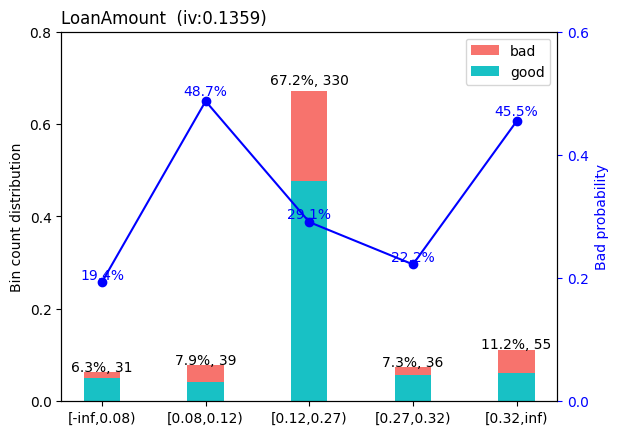

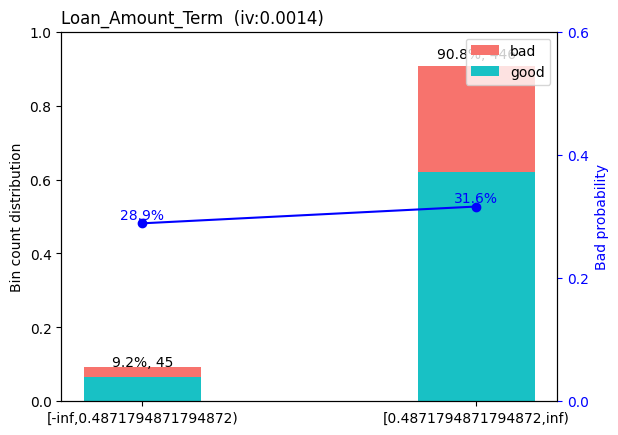

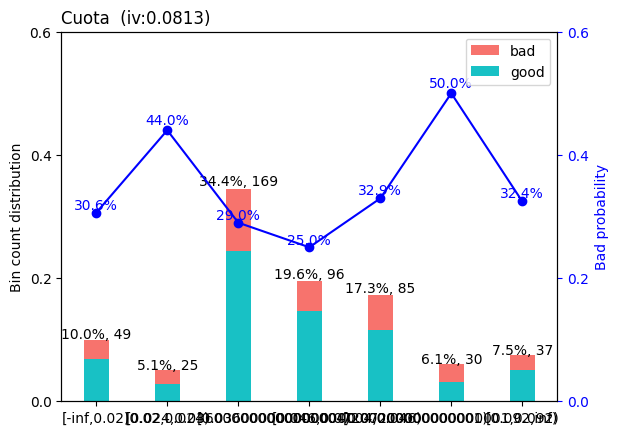

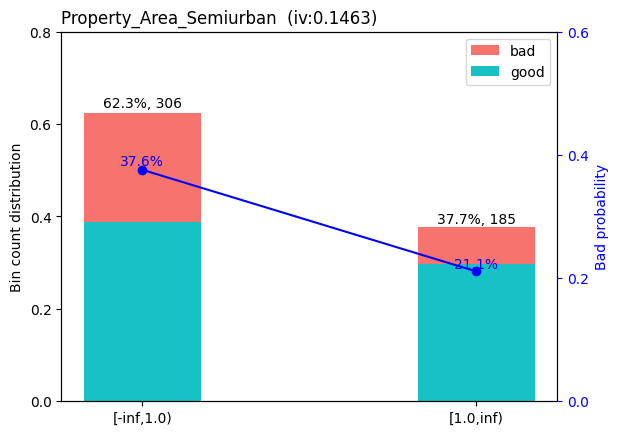

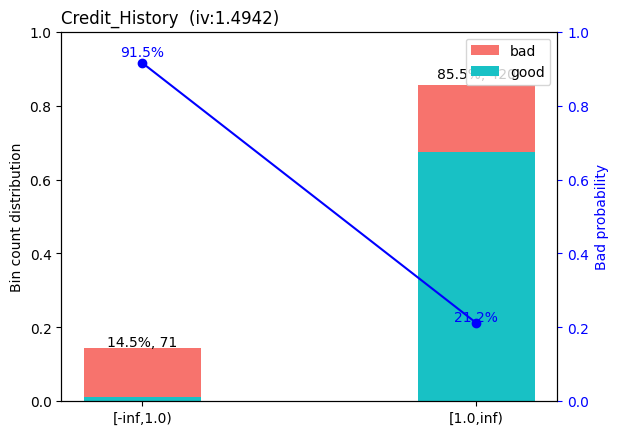

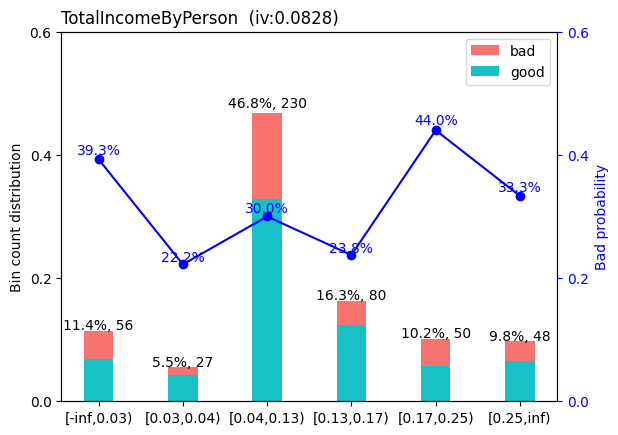

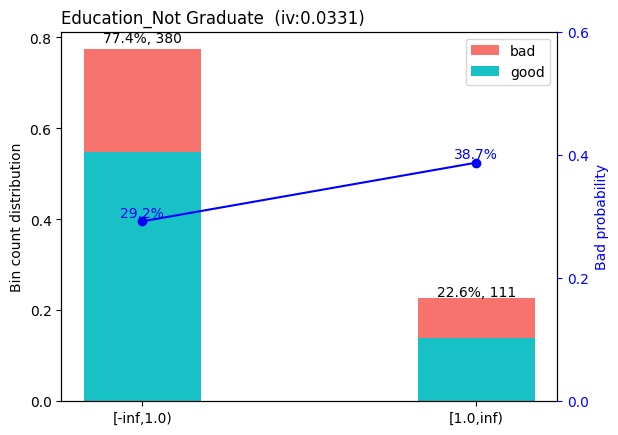

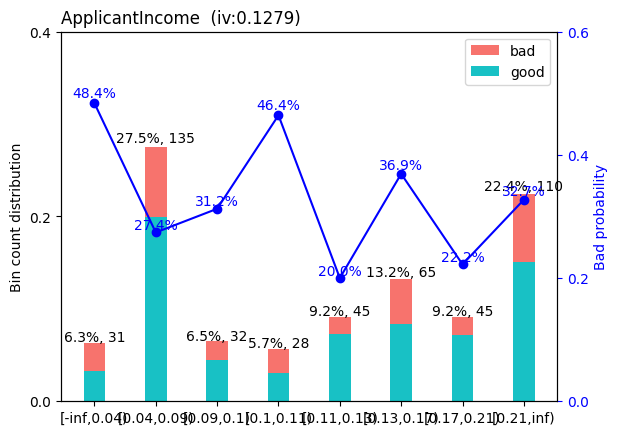

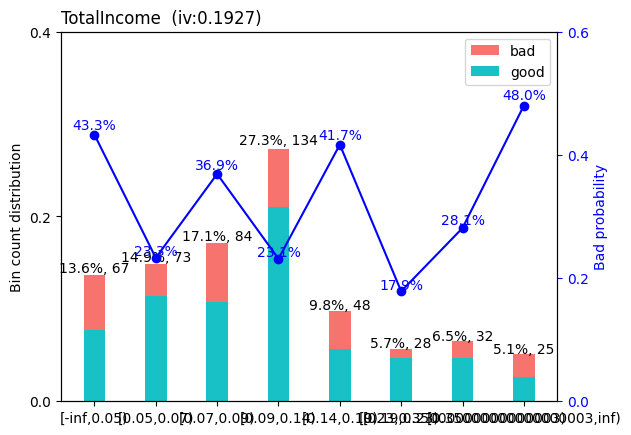

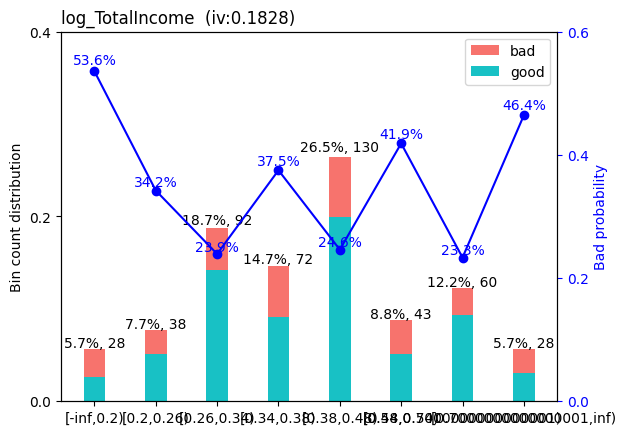

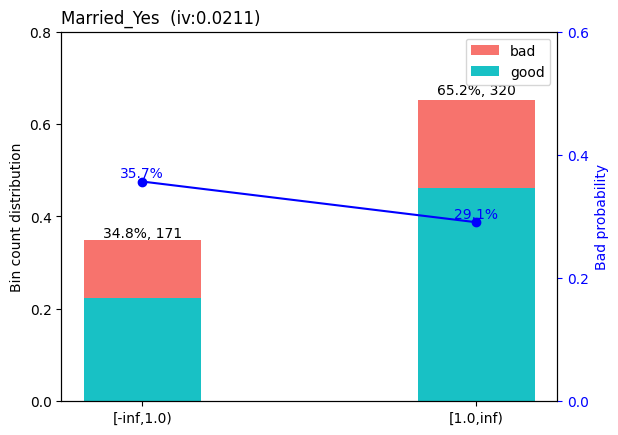

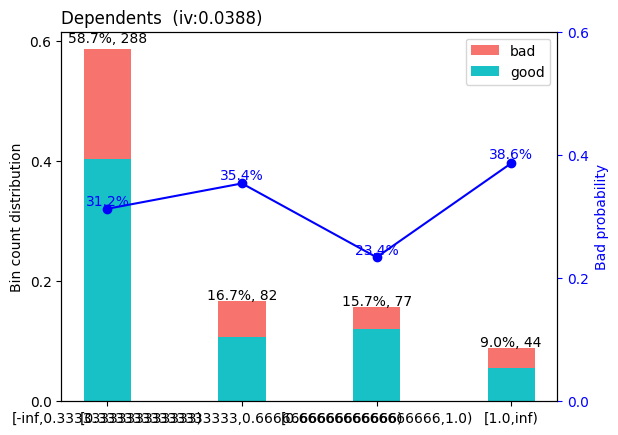

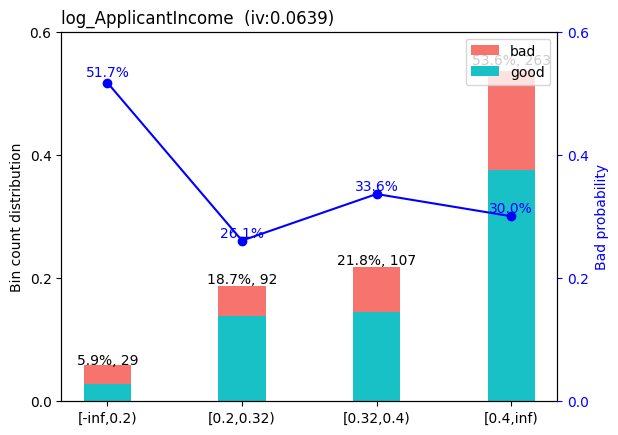

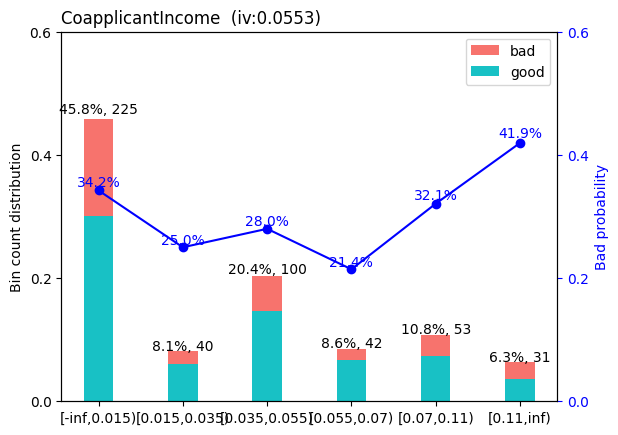

In [84]:
import matplotlib.pyplot as plt

# Revisamos las relaciones bivariadas y damos los insigths accionables a los negocios!
sc.woebin_plot(bins)
plt.show()

In [ ]:
# binning adjustment
##  adjust breaks interactively
breaks_adj = sc.woebin_adj(desarrll_subset_woe, target, bins)

In [ ]:
breaks_adj

In [ ]:
bins_adj = sc.woebin(desarrll_subset_woe, y=target, breaks_list=breaks_adj)

In [ ]:
train_woe = sc.woebin_ply(desarrll_subset_woe, bins_adj)

In [ ]:
train_woe.head()

In [ ]:
# agregando las variables woe creadas a la base general

X_train_total_woe = pd.concat([X_train_num_imputed3, train_woe], axis = 1)
X_train_total_woe.head()

In [ ]:
X_train_scaled.shape

In [ ]:
X_train_total_woe.shape

## Selección inicial de variables

Después del análisis univariado, eliminando variables con muchos nulos y con valores constantes, podemos usar los siguientes códigos para seleccionar variables con los métodos de la correlación de Pearson y el coeficiente de Chi-cuadrado:

In [ ]:
# Definimos el nombre de las variables y el número óptimo que buscamos!
feature_name = list(X_train_total_woe.columns)
# no of maximum features we need to select
num_feats=10

In [ ]:
X_train_total_woe

In [ ]:
k = X_train_total_woe.drop(columns = target)

In [ ]:
type(k)

In [ ]:
X_train_total_woe

In [ ]:
y_train

In [ ]:
# Correlacion de Pearson!   Recomendado para target numéricos
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X_train_total_woe.drop(columns = target), y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

In [ ]:
cor_feature[0:num_feats]

In [ ]:
cor_list.sort(reverse=True)
cor_list[0:num_feats]

In [ ]:
# Metodo de Chi-2 de Inpdependencia!    Recomendado para target binarias y categóricas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

num_feats=10

X_norm = MinMaxScaler().fit_transform(X_train_total_woe.drop(columns = target))
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train_total_woe.drop(columns = target).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

In [ ]:
chi_selector.pvalues_[0:num_feats]

In [ ]:
chi_feature

Más sobre la función SelectKbest:

https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html